# **Experiment #2 - TBRC Monitoring (Step By Step)**

This notebook demonstrates the key processing steps of the TBRC monitoring software.

<br>

**Step 1.1 Load the external dependencies.**

In [8]:
# import standard modules
import pandas as pd
import numpy as np
from numpy import array
from numpy import hstack
import matplotlib.pyplot as plt

# import keras modules for creating and training LSTM Model
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras import models
from sklearn.preprocessing import MinMaxScaler #consider StandardScaler?

# import tensorflow
import tensorflow as tf

# import pickle, for loading the saved scaler file
from pickle import load

<br>

**Step 1.2 Define the support function for performing the forecast.**

In [9]:
# function to handle the forecast, called in STEP 4
# accepts 
def forecast(data,periods):
    
    d = data # input data for the prediction
    p = periods # number of periods to predict into the future
    pred = [] # list to store predictions
    
    n_input = 20 # number of recent periods to pass to the predictor
    n_features = 2 # number of features (2 - temperature and luminosity)
    
    # get the last 20 points from data
    latest = data[-n_input:]
    
    # scale the data based on the scale of the training data
    latest = scaler.transform(latest)

    # reshape the data so that it is in the correct format for tensorflow
    current = latest.reshape((1, n_input, n_features))
    
    # perform 12 predictions
    for i in range(periods):
        
        # get the prediction for first period
        current_pred = model.predict(current)[0]
        
        # append the prediction to the array (to be returned to the calling function)
        pred.append(current_pred)

        # add the prediction to the input array; remove the first value
        current = np.append(current[:,1:,:],[[current_pred]],axis=1)
    
    # reverse the scaling
    pred = scaler.inverse_transform(pred)
    
    # return the predicted value list
    return pred

<br>

**Step 1.3. Define support function for performing the alerting.**

In [10]:
# function to determine if an alert should be triggered, called in STEP 4
# accepts the predicted values as an input
# generates an alert if the treshold is exceeded
def eval_alert(_pred):
    
    # default alert to false
    alert = False
    
    #calculate delta between the first predicted value and the last to determine the predicted increase
    f = _pred[0] #first val
    l = _pred[-1] #last val
    
    i = l - f # calculated predicted increase
    t = 10 # configurable threshold
    
    # check if the temperature is predicted to grow faster than the threshold (10 degrees) in the next minute
    if (i[1] > t):
        print(f"Temperature predicted to climb by {i[1]}°C in the next minute. Remain alert and prepare to turn off the coke feed.")
        
        # set alert status to true; to be returned to calling function
        alert = True
    else:
        print("No alarm.")
    
    return alert

<br>

**Step 1.4 Define the support function for visualizing the results.**

In [11]:
# function to prepare the values for visualization, called in STEP 4
# accepts the input, the predicted value, the alert status, and the index (qq)
# generates a visualization showing the prediction
def viz(input, pred, alert, qq):
    
    # inputs
    l = len(input) #length of input array
    a_ind = [z + 1 for z in range(l)] # list comprehension to extract indexes from input values
    a_lum = [z[0] for z in input] # list comprehension to extract luminosity from input values
    a_temp = [z[1] for z in input] # list comprehension to extract tmeperature from input values

    # predictions
    q = len(pred) #length of prediction array
    p_ind = [z + 1 for z in range(l -1, l - 1 + q + 1)] # list comprehension to extract indexes from prediction values
    p_lum = [z[0] for z in pred] # list comprehension to extract luminosity from prediction values
    p_temp = [z[1] for z in pred] # list comprehension to extract temperature from prediction values

    # insert the last actual into the prediction array, to join the line segments
    p_lum.insert(0, a_lum[-1])
    p_temp.insert(0, a_temp[-1])

    # specify the plot size
    plt.figure(figsize=(12,6))

    # change forecast line color if alert = true
    if (alert == True):
        facecolor = "red"
        color = "red"
    else:
        facecolor = "white"
        color = "blue"
    
    #plot temperature actuals + prediction
    plt.plot(a_ind,a_temp, marker="o", zorder=2, color="blue", label="Temp. Input") # input
    plt.plot(p_ind,p_temp, marker="o", zorder=1, color=color, ls="--", label="Temp Prediction", markerfacecolor=facecolor) # prediction

    # set plot title
    plt.title('Current and Forecast')

    # set plot legend location
    plt.legend(loc="upper left")
    
    #set upper and lower y-axis limits for visualization purposes
    plt.ylim(180,335)
    
    #note: If showing the plot, the plt.show() call needs to come after the plt.savefig() call, otherwise the file image will be blank.
    
    # optional - save the plot image (used for report prepration)
    #plt.savefig(f"./Animation/{qq}.png")  
    
    #show plot
    plt.show()

<br>

**Step 2. Load the trained LSTM model.**

In [12]:
# load the model
model = models.load_model('RMSE/forecast_model_12.26')
#model = models.load_model('RMSE/forecast_model_10.81')

# load the scaler that was stored during model training
scaler = load(open('scaler.pkl', 'rb'))

<br>

**Step 3. Read the simulated data from CSV.**

In [13]:
# read the temperature and brightness data from the test CSV
df = pd.read_csv('DATA/test.csv', usecols=["Brightness", "Temperature"])

# convert dataframe to numpy array
input = df.to_numpy()

<br>

**Step 4. Perform the prediction and any required alerting; visualize the result (100 times).**

Iteration: 0
No alarm.


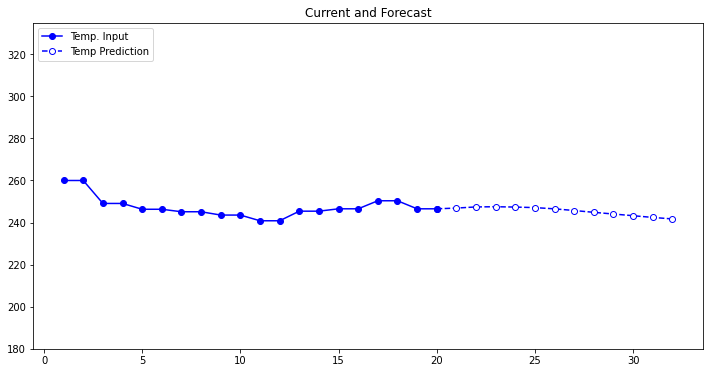

Iteration: 1
No alarm.


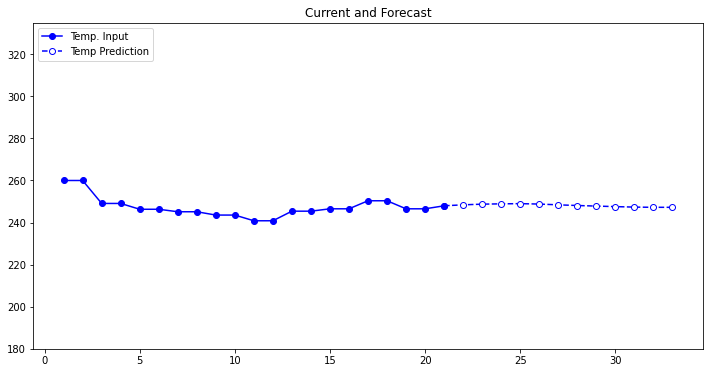

Iteration: 2
No alarm.


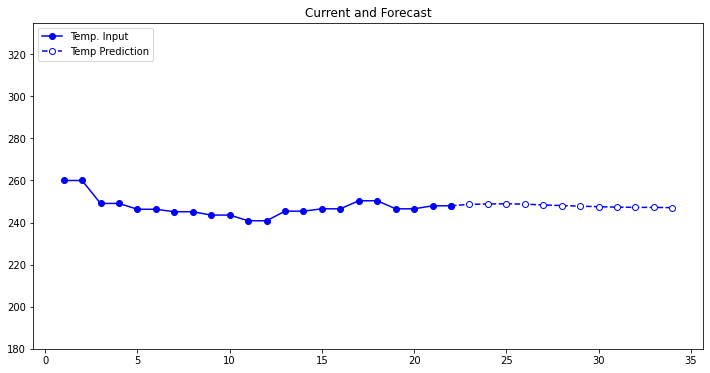

Iteration: 3
No alarm.


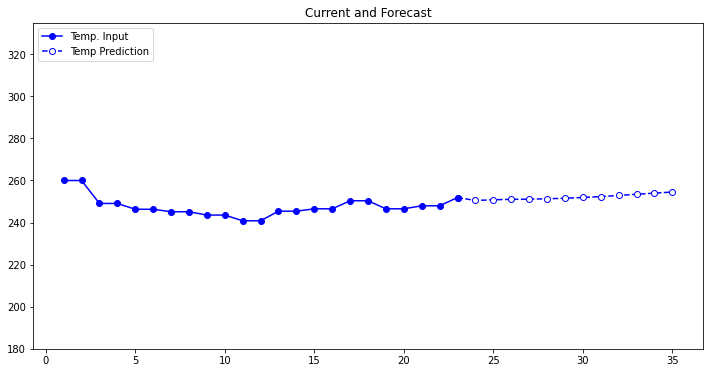

Iteration: 4
No alarm.


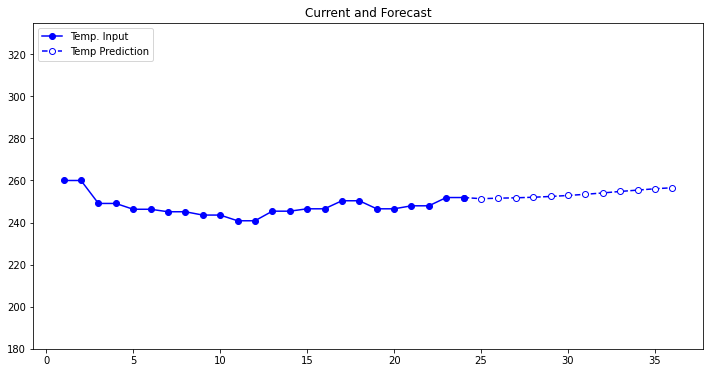

Iteration: 5
No alarm.


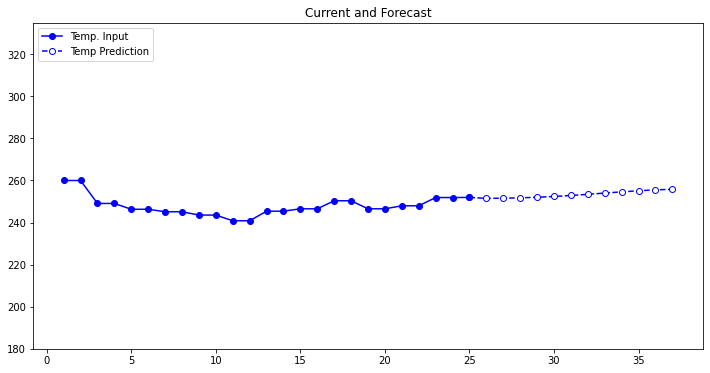

Iteration: 6
No alarm.


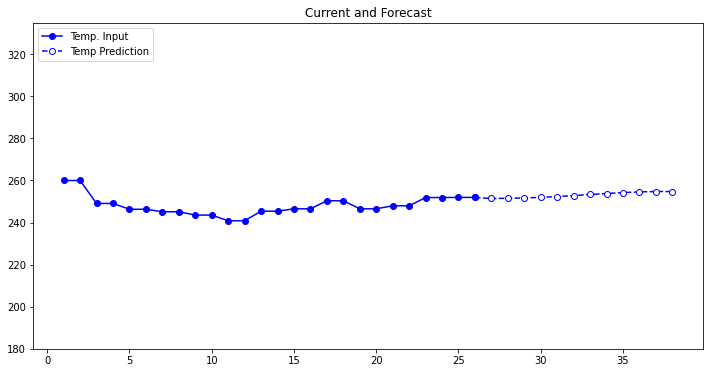

Iteration: 7
No alarm.


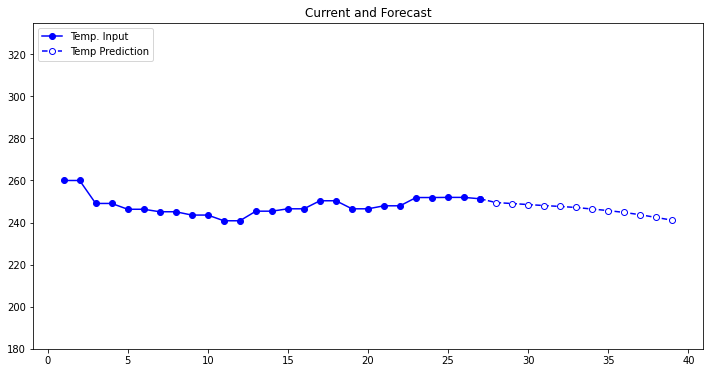

Iteration: 8
No alarm.


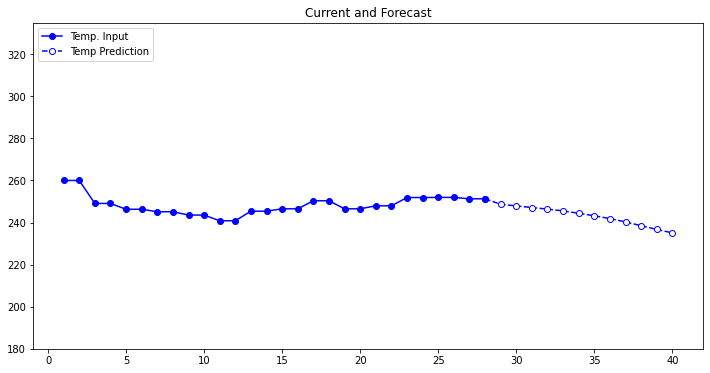

Iteration: 9
No alarm.


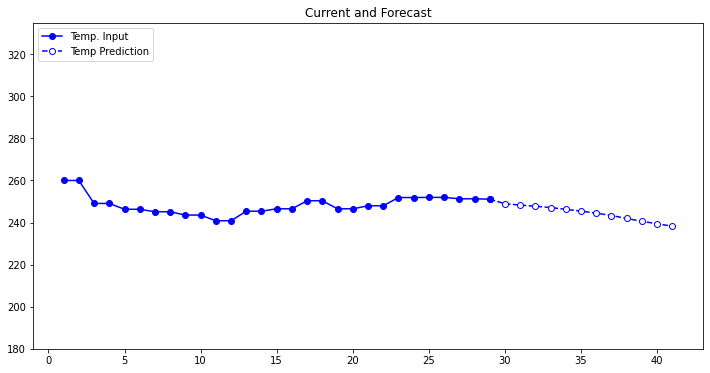

Iteration: 10
No alarm.


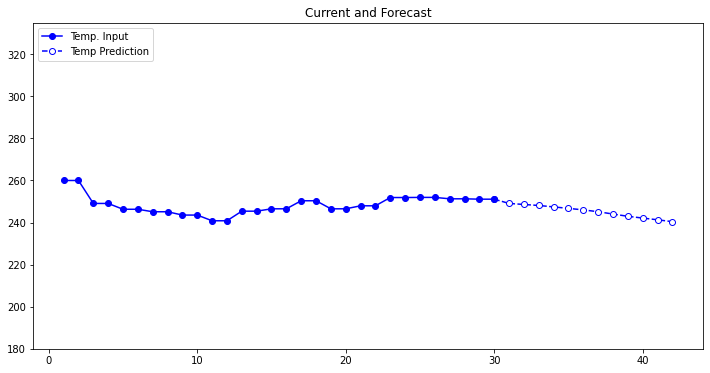

Iteration: 11
No alarm.


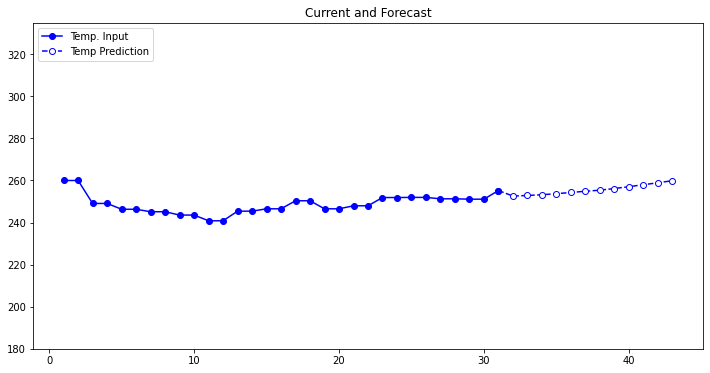

Iteration: 12
Temperature predicted to climb by 12.15323879687827°C in the next minute. Remain alert and prepare to turn off the coke feed.


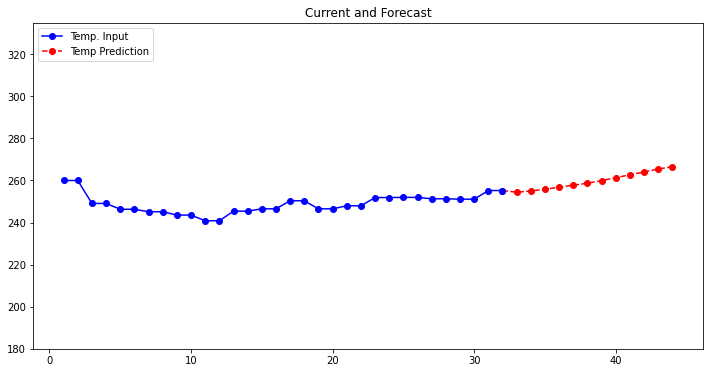

Iteration: 13
Temperature predicted to climb by 24.28624443129513°C in the next minute. Remain alert and prepare to turn off the coke feed.


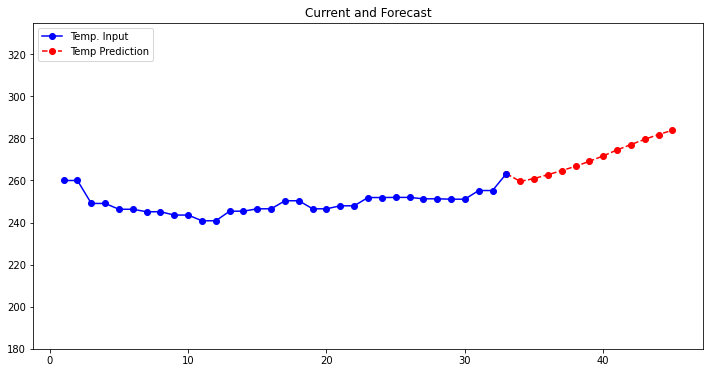

Iteration: 14
Temperature predicted to climb by 27.294531133545547°C in the next minute. Remain alert and prepare to turn off the coke feed.


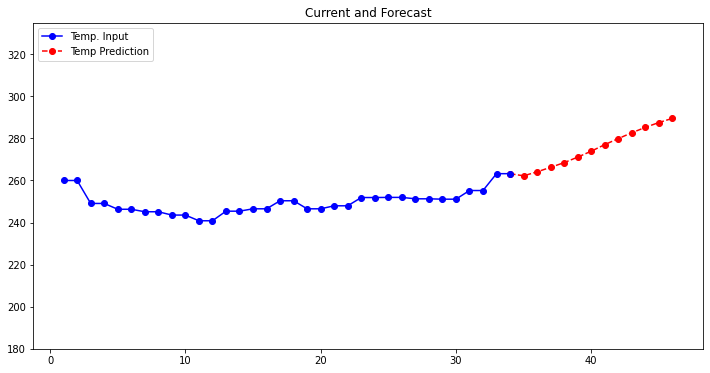

Iteration: 15
Temperature predicted to climb by 26.301864535390052°C in the next minute. Remain alert and prepare to turn off the coke feed.


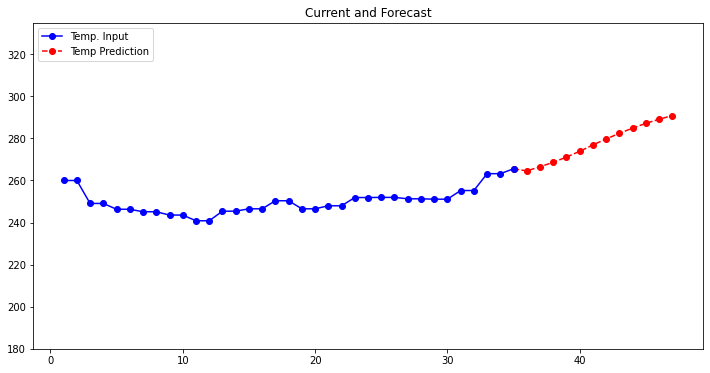

Iteration: 16
Temperature predicted to climb by 21.782947302845002°C in the next minute. Remain alert and prepare to turn off the coke feed.


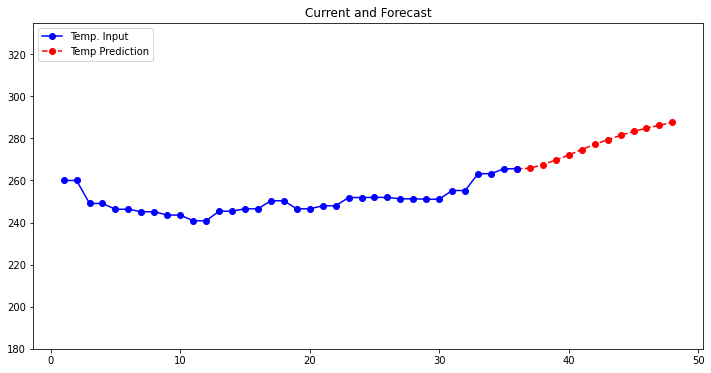

Iteration: 17
Temperature predicted to climb by 20.54188281900815°C in the next minute. Remain alert and prepare to turn off the coke feed.


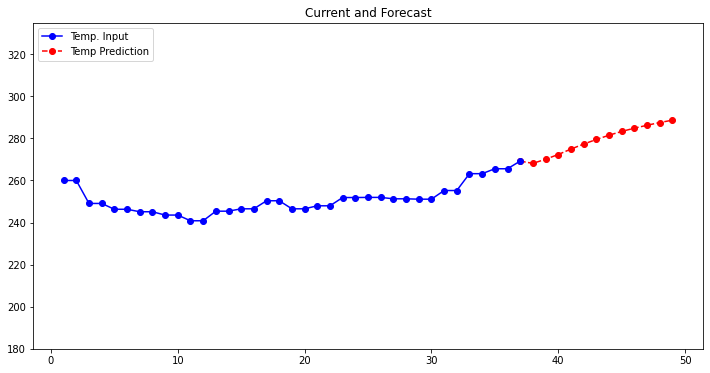

Iteration: 18
Temperature predicted to climb by 15.650222978634076°C in the next minute. Remain alert and prepare to turn off the coke feed.


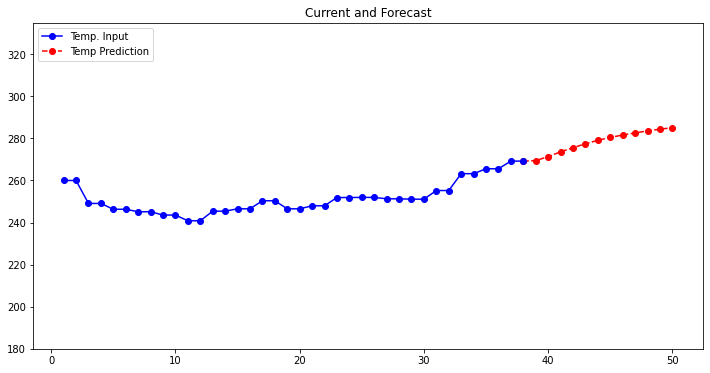

Iteration: 19
Temperature predicted to climb by 27.325838496479605°C in the next minute. Remain alert and prepare to turn off the coke feed.


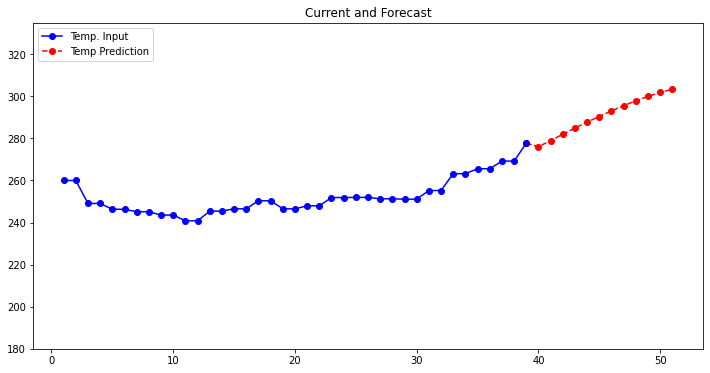

Iteration: 20
Temperature predicted to climb by 25.290890067002294°C in the next minute. Remain alert and prepare to turn off the coke feed.


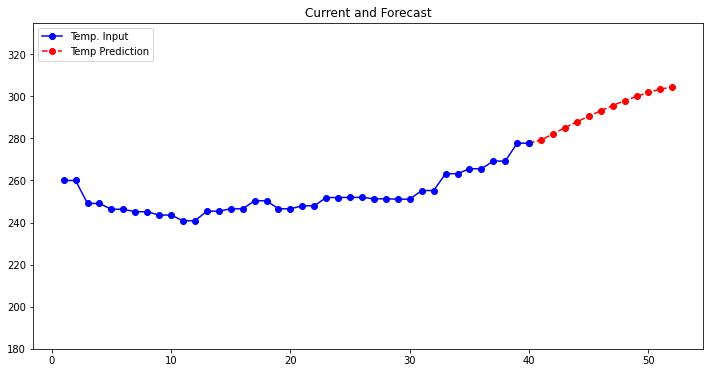

Iteration: 21
Temperature predicted to climb by 30.8350882475288°C in the next minute. Remain alert and prepare to turn off the coke feed.


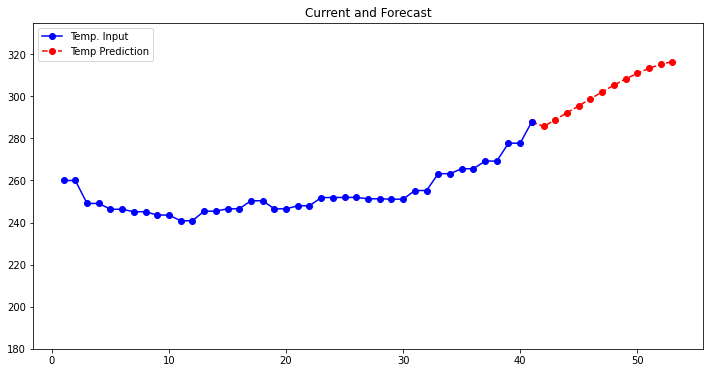

Iteration: 22
Temperature predicted to climb by 23.894243874300855°C in the next minute. Remain alert and prepare to turn off the coke feed.


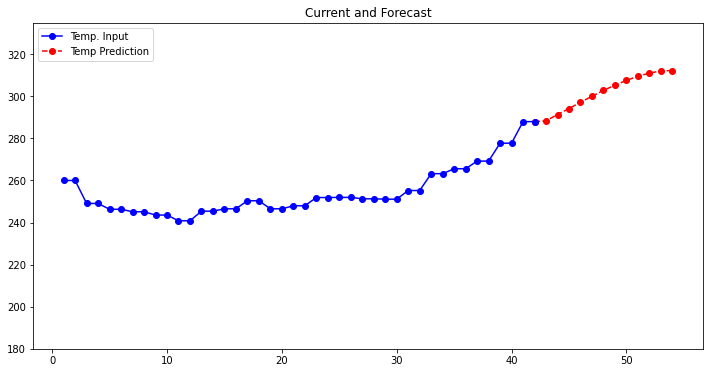

Iteration: 23
Temperature predicted to climb by 27.41446226149685°C in the next minute. Remain alert and prepare to turn off the coke feed.


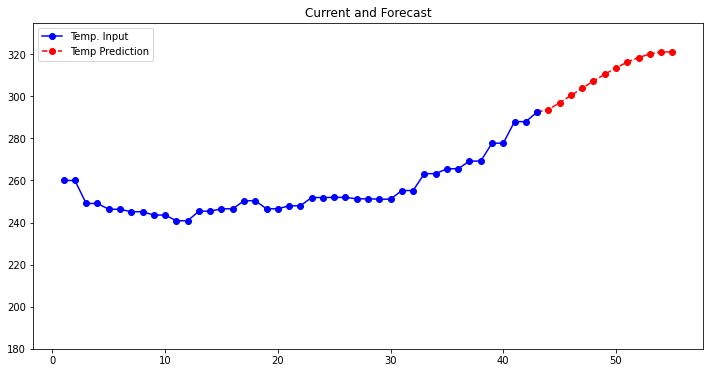

Iteration: 24
Temperature predicted to climb by 18.41808944211658°C in the next minute. Remain alert and prepare to turn off the coke feed.


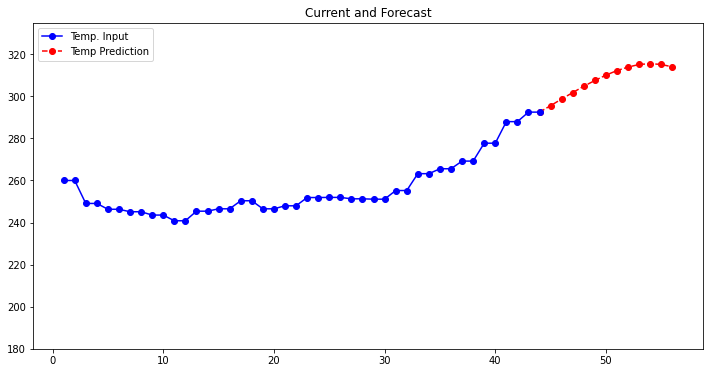

Iteration: 25
No alarm.


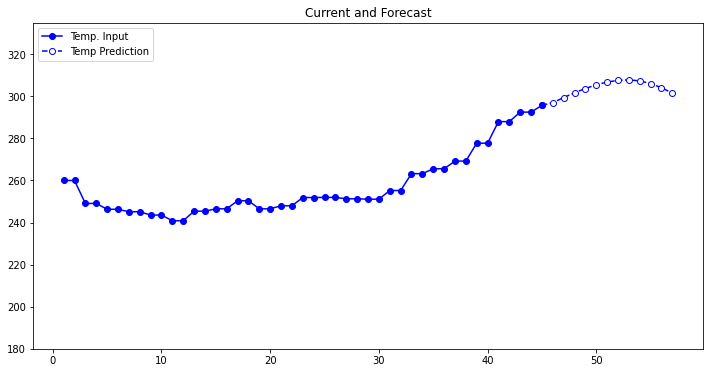

Iteration: 26
No alarm.


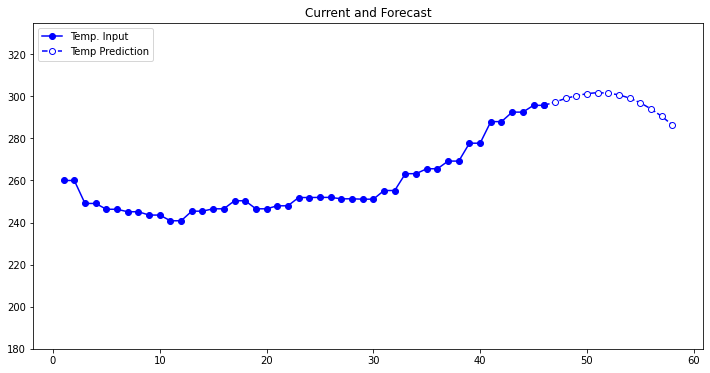

Iteration: 27
No alarm.


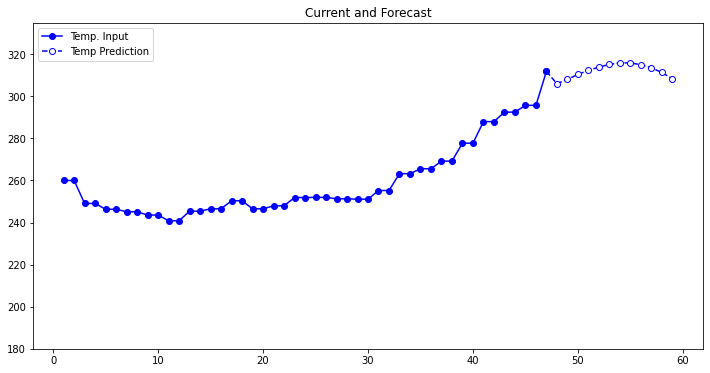

Iteration: 28
No alarm.


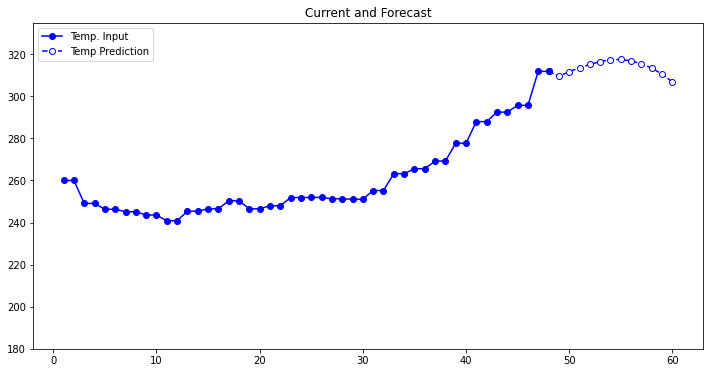

Iteration: 29
No alarm.


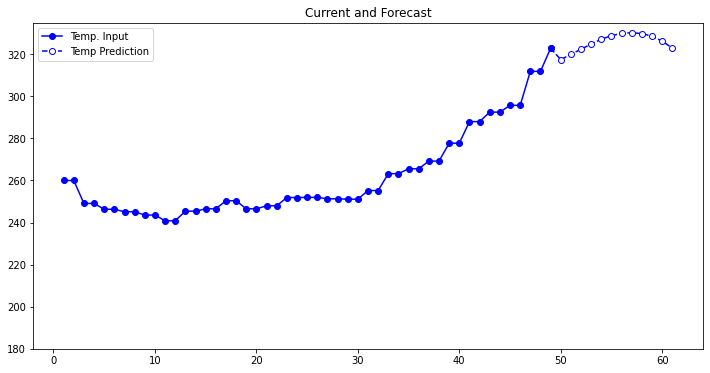

Iteration: 30
No alarm.


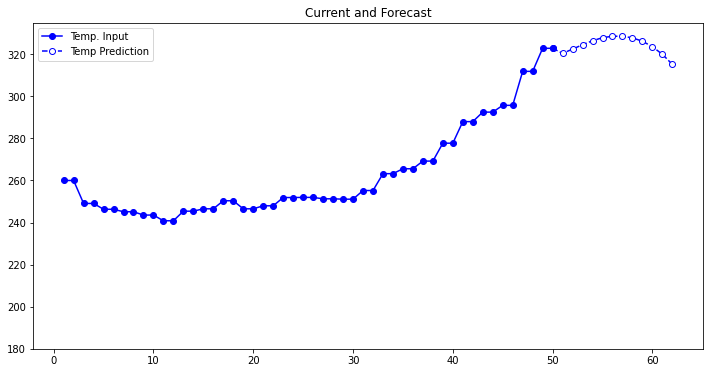

Iteration: 31
No alarm.


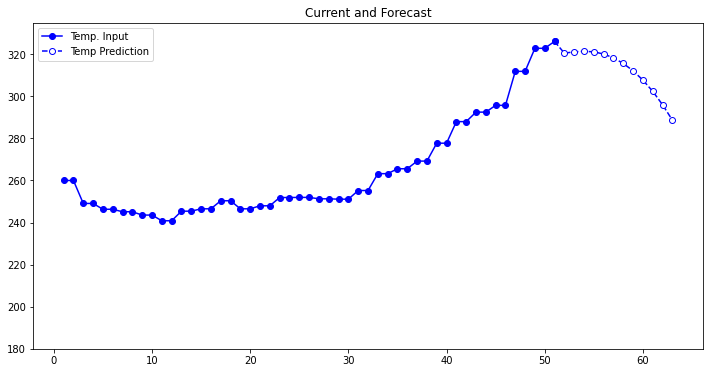

Iteration: 32
No alarm.


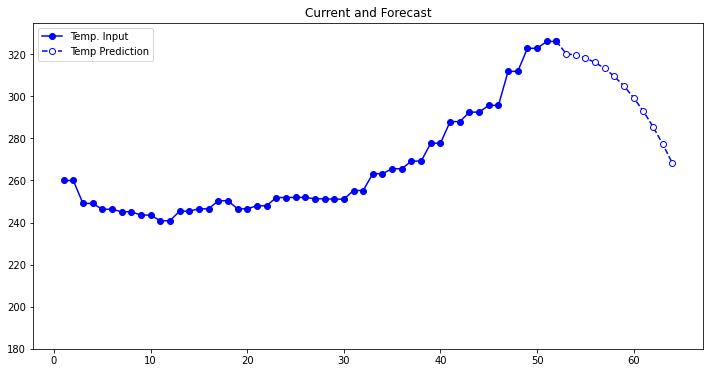

Iteration: 33
No alarm.


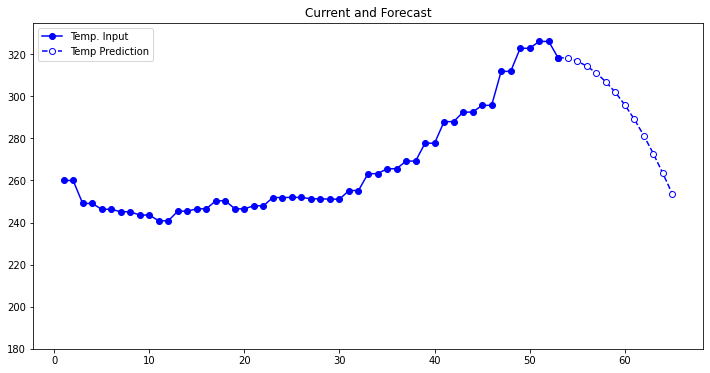

Iteration: 34
No alarm.


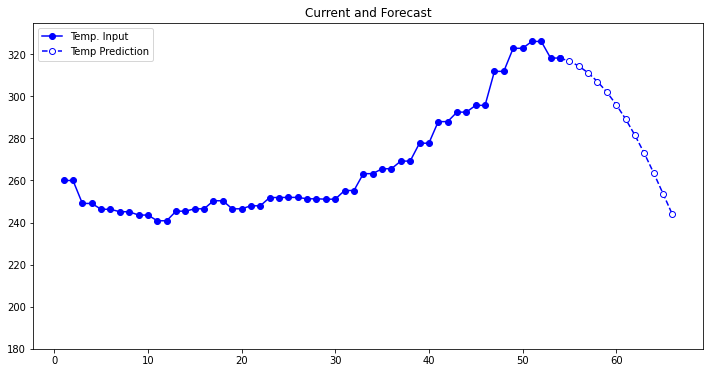

Iteration: 35
No alarm.


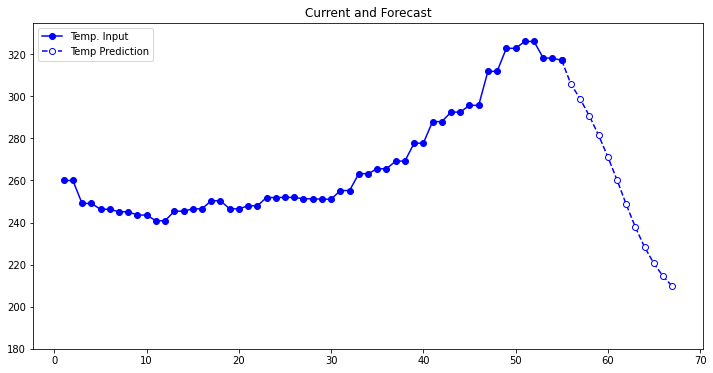

Iteration: 36
No alarm.


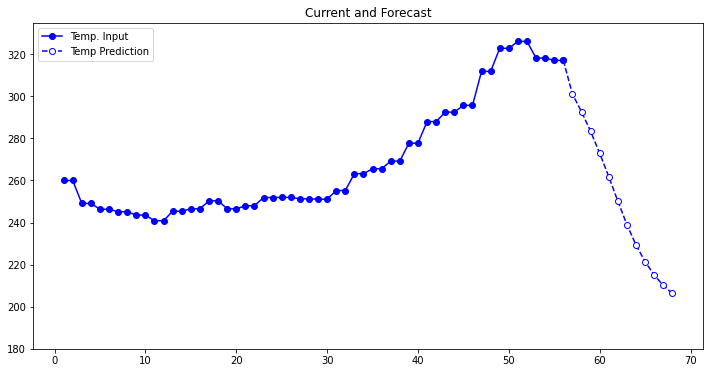

Iteration: 37
No alarm.


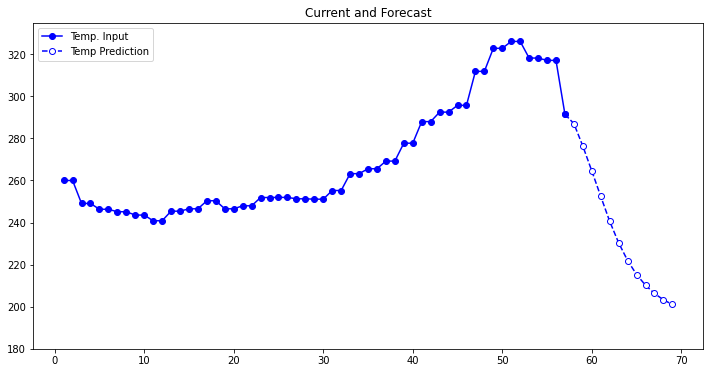

Iteration: 38
No alarm.


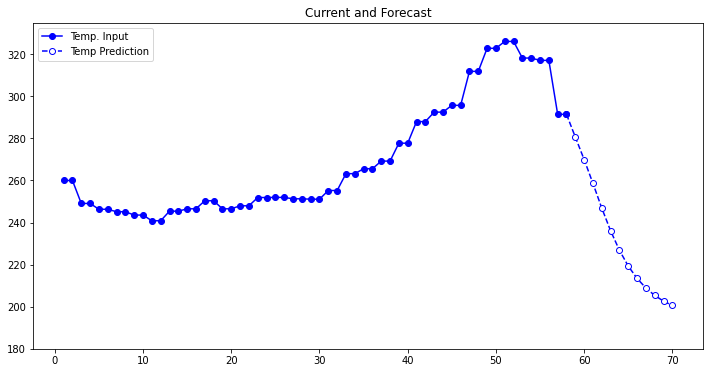

Iteration: 39
No alarm.


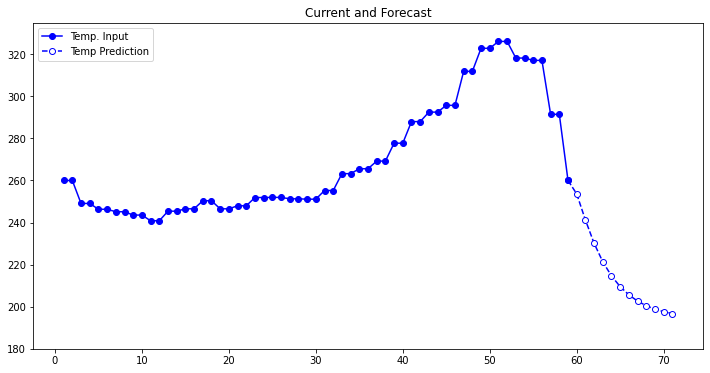

Iteration: 40
No alarm.


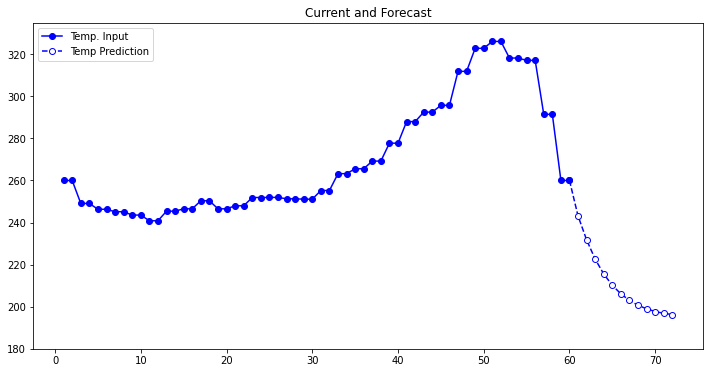

Iteration: 41
No alarm.


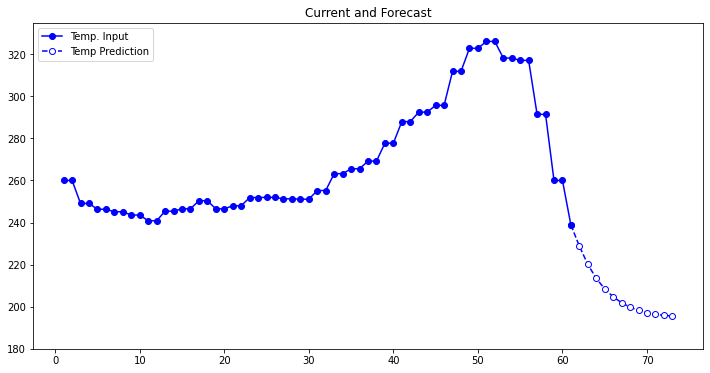

Iteration: 42
No alarm.


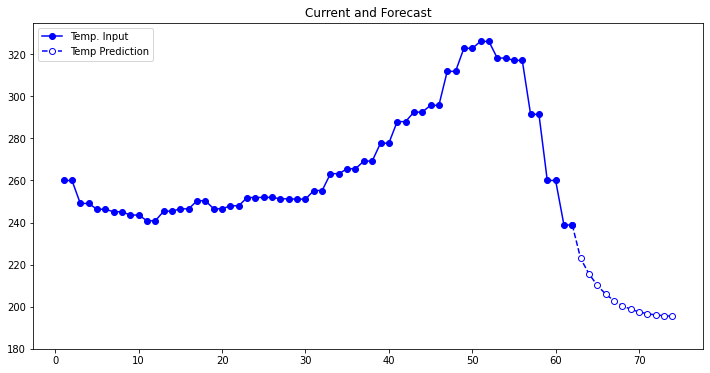

Iteration: 43
No alarm.


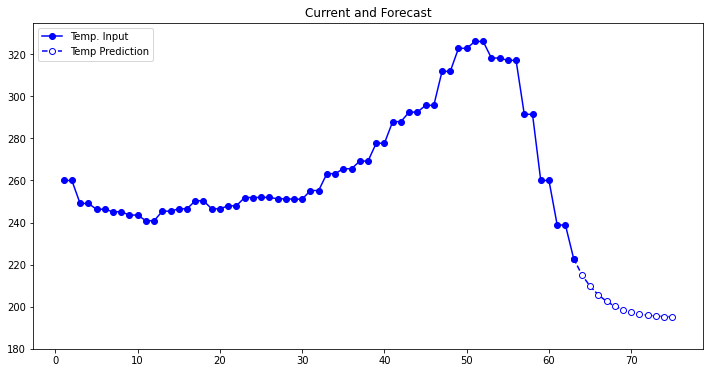

Iteration: 44
No alarm.


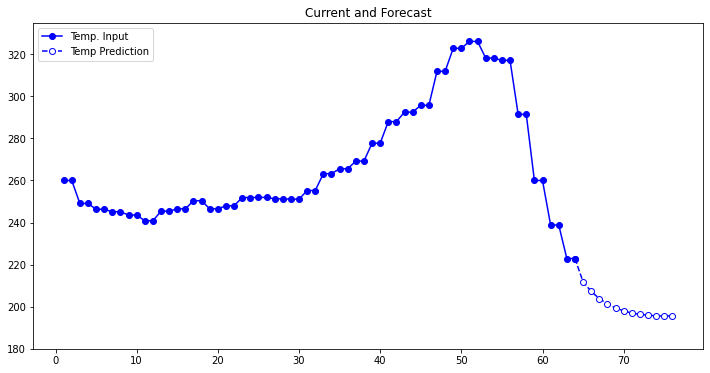

Iteration: 45
No alarm.


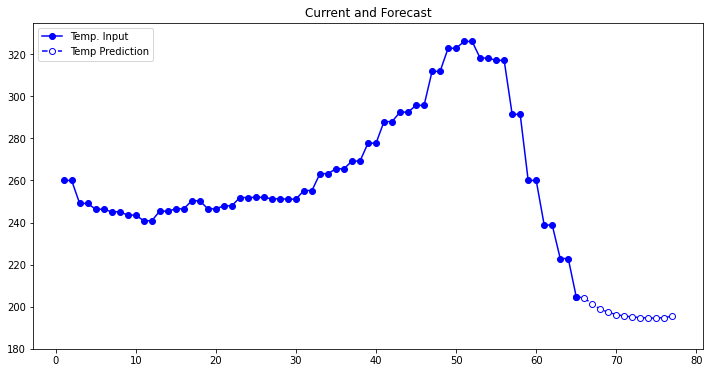

Iteration: 46
No alarm.


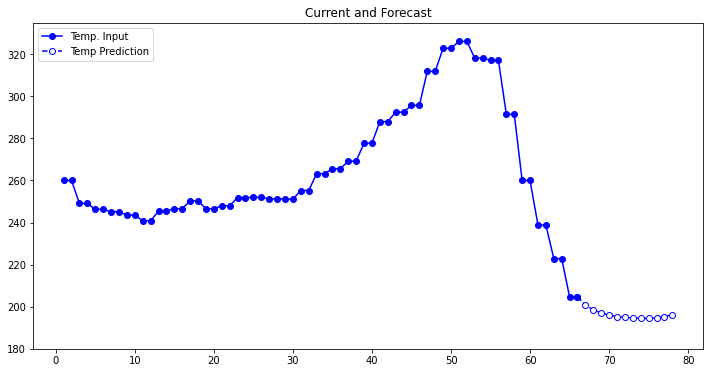

Iteration: 47
No alarm.


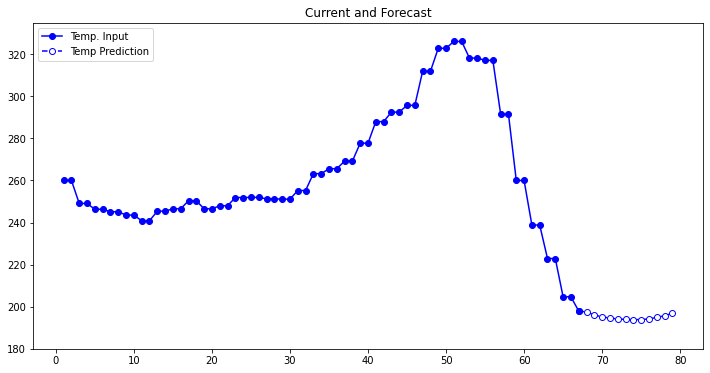

Iteration: 48
No alarm.


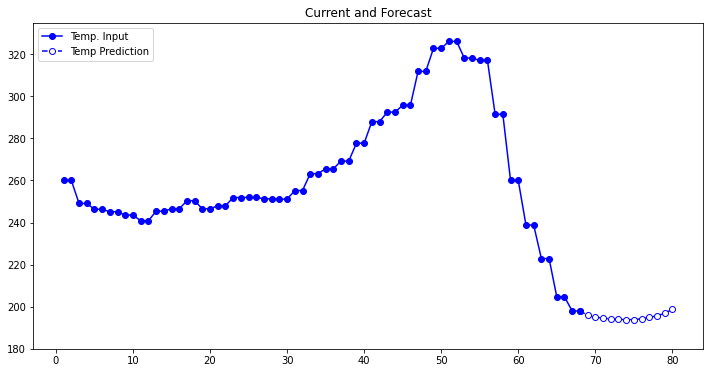

Iteration: 49
No alarm.


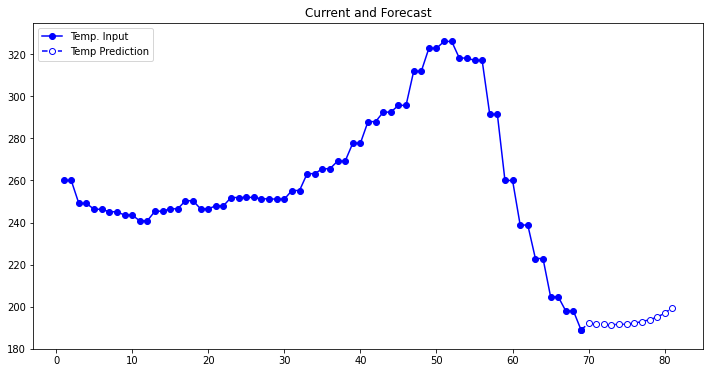

Iteration: 50
Temperature predicted to climb by 11.46171705923814°C in the next minute. Remain alert and prepare to turn off the coke feed.


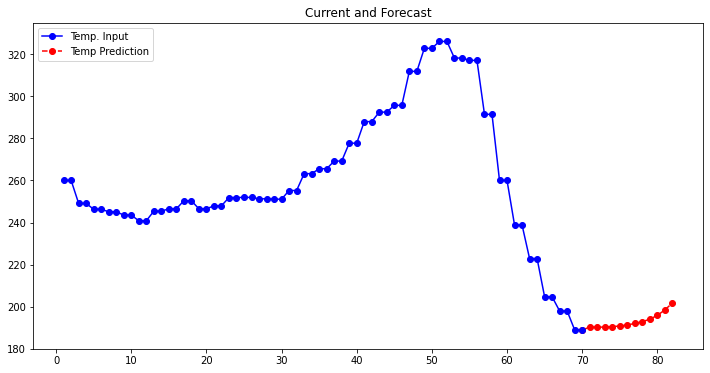

Iteration: 51
Temperature predicted to climb by 15.762837493426957°C in the next minute. Remain alert and prepare to turn off the coke feed.


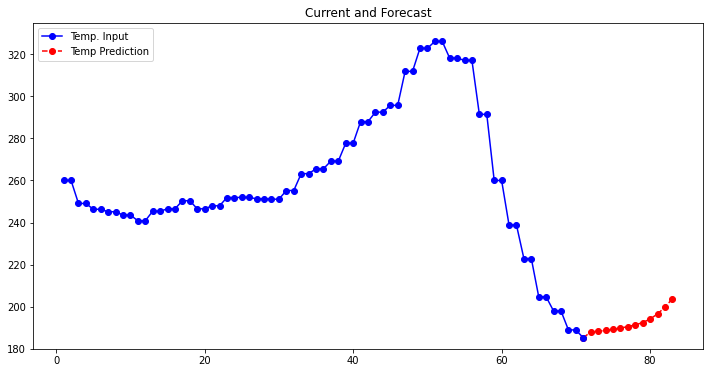

Iteration: 52
Temperature predicted to climb by 19.980853040421522°C in the next minute. Remain alert and prepare to turn off the coke feed.


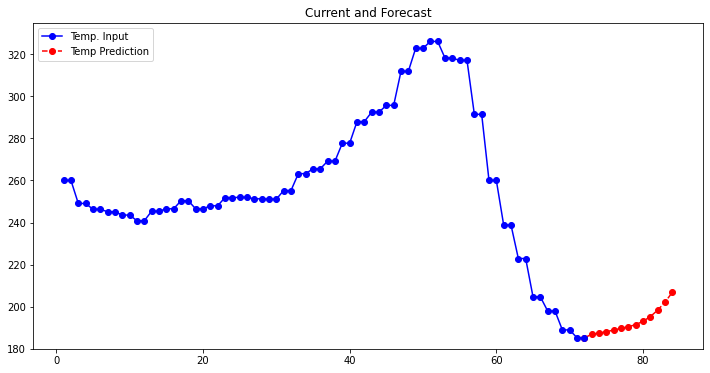

Iteration: 53
Temperature predicted to climb by 24.48331292023272°C in the next minute. Remain alert and prepare to turn off the coke feed.


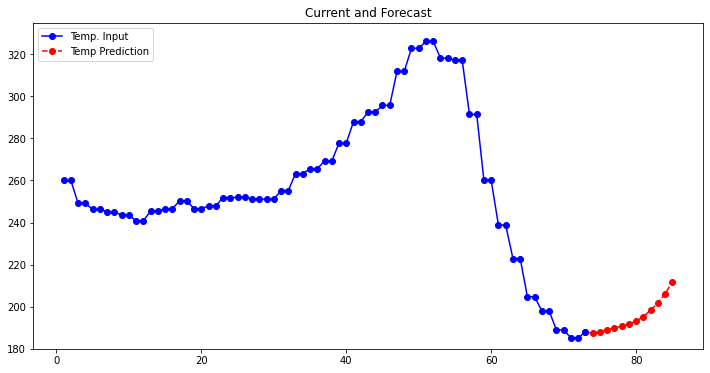

Iteration: 54
Temperature predicted to climb by 29.107490352867245°C in the next minute. Remain alert and prepare to turn off the coke feed.


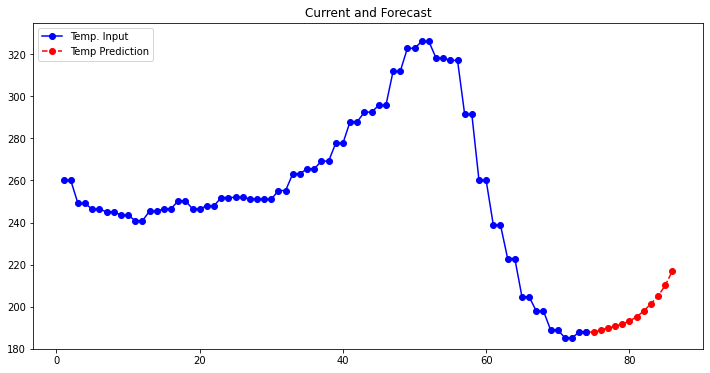

Iteration: 55
Temperature predicted to climb by 34.36397673334724°C in the next minute. Remain alert and prepare to turn off the coke feed.


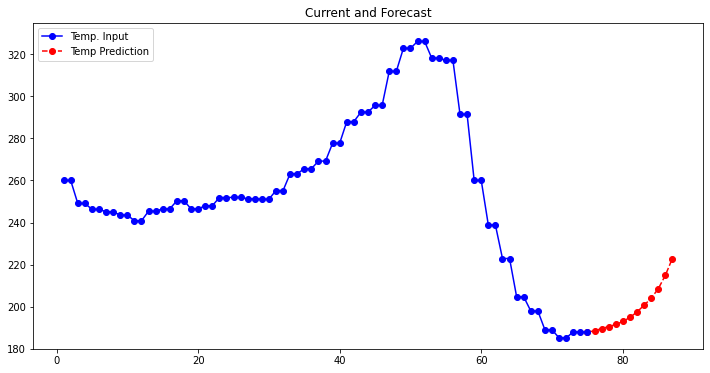

Iteration: 56
Temperature predicted to climb by 38.95016608928094°C in the next minute. Remain alert and prepare to turn off the coke feed.


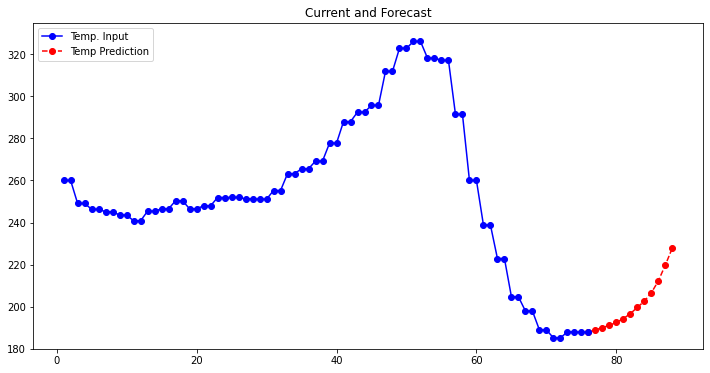

Iteration: 57
Temperature predicted to climb by 45.39339405418434°C in the next minute. Remain alert and prepare to turn off the coke feed.


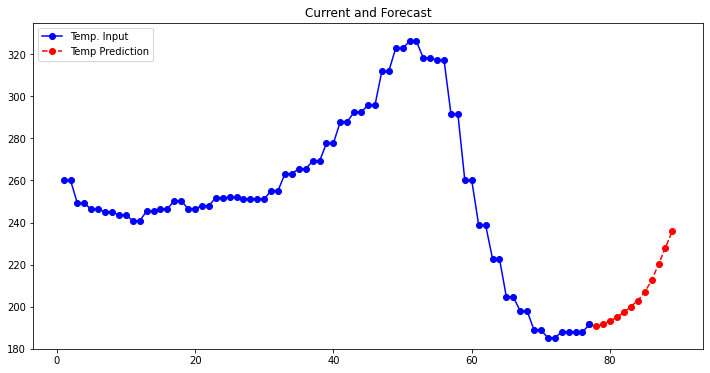

Iteration: 58
Temperature predicted to climb by 51.22642628407897°C in the next minute. Remain alert and prepare to turn off the coke feed.


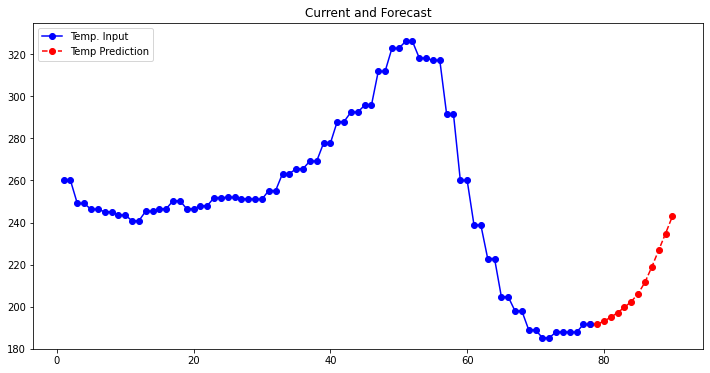

Iteration: 59
Temperature predicted to climb by 51.4919369010172°C in the next minute. Remain alert and prepare to turn off the coke feed.


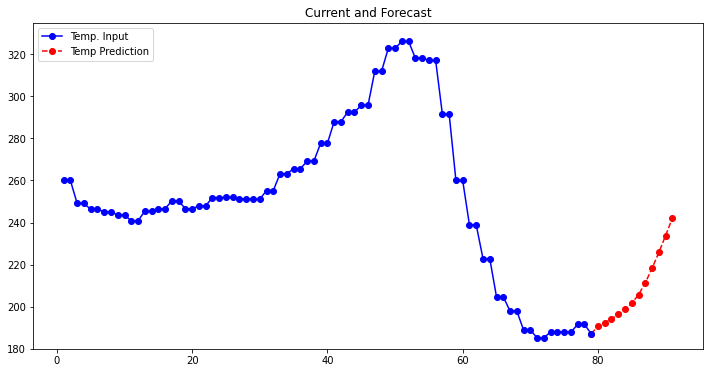

Iteration: 60
Temperature predicted to climb by 52.676407595715915°C in the next minute. Remain alert and prepare to turn off the coke feed.


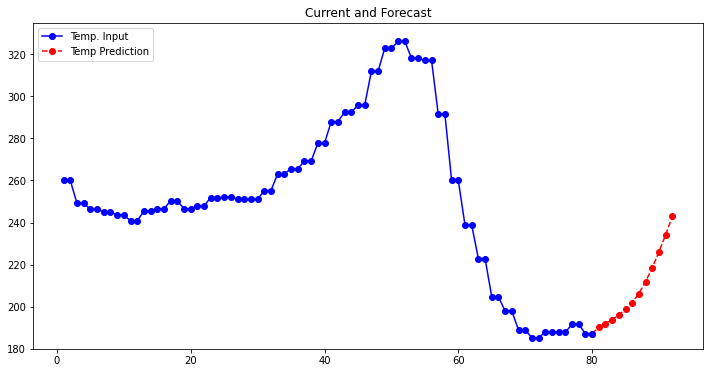

Iteration: 61
Temperature predicted to climb by 57.26461147086857°C in the next minute. Remain alert and prepare to turn off the coke feed.


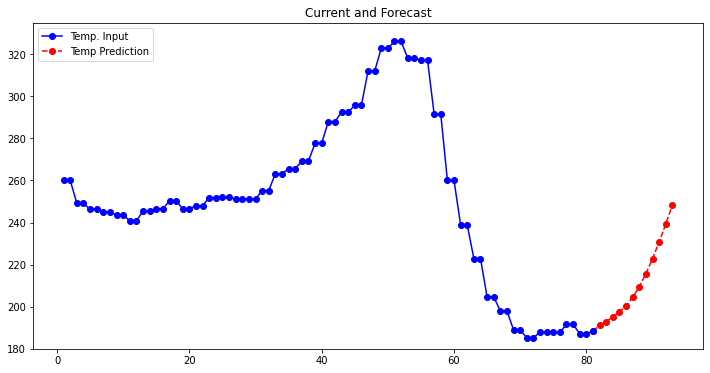

Iteration: 62
Temperature predicted to climb by 60.9630161565685°C in the next minute. Remain alert and prepare to turn off the coke feed.


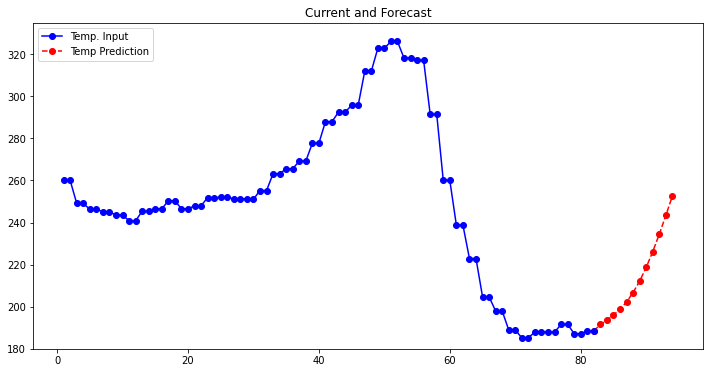

Iteration: 63
Temperature predicted to climb by 70.47915504193676°C in the next minute. Remain alert and prepare to turn off the coke feed.


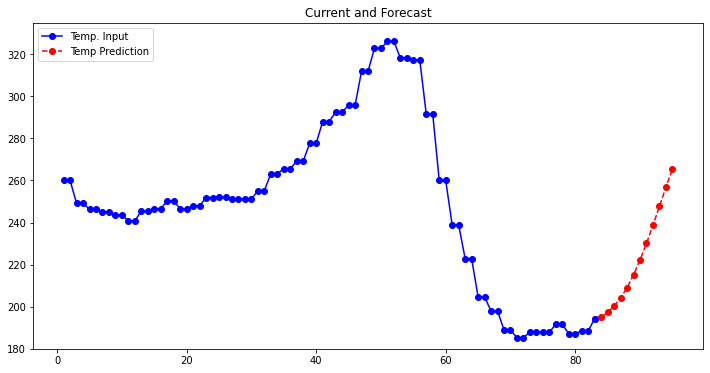

Iteration: 64
Temperature predicted to climb by 75.22063957499338°C in the next minute. Remain alert and prepare to turn off the coke feed.


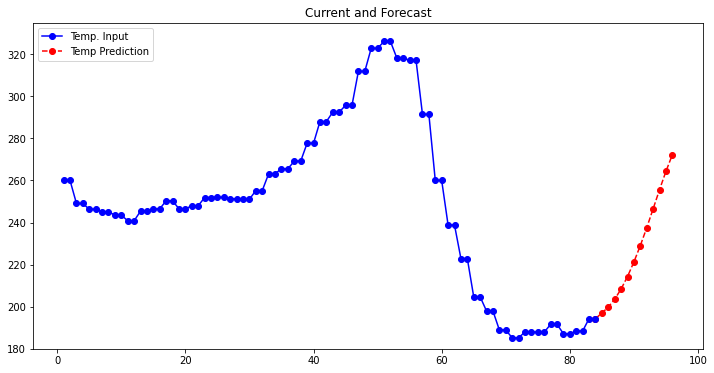

Iteration: 65
Temperature predicted to climb by 77.7719785254667°C in the next minute. Remain alert and prepare to turn off the coke feed.


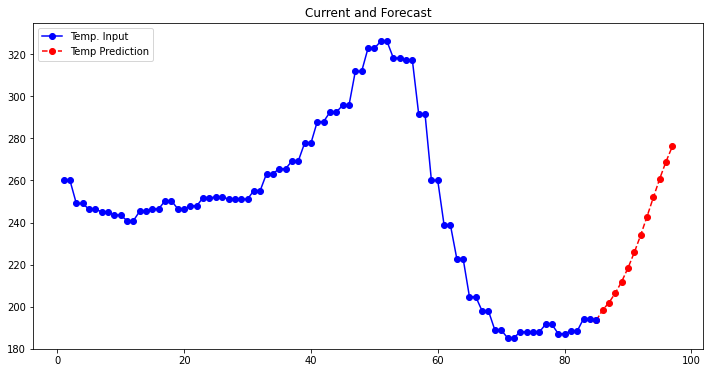

Iteration: 66
Temperature predicted to climb by 77.72494207797573°C in the next minute. Remain alert and prepare to turn off the coke feed.


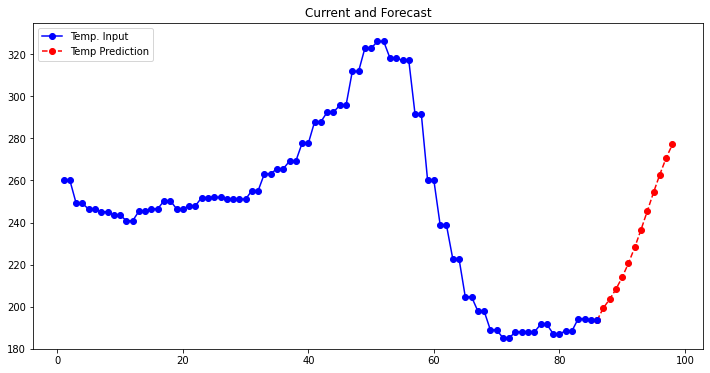

Iteration: 67
Temperature predicted to climb by 76.78156899313603°C in the next minute. Remain alert and prepare to turn off the coke feed.


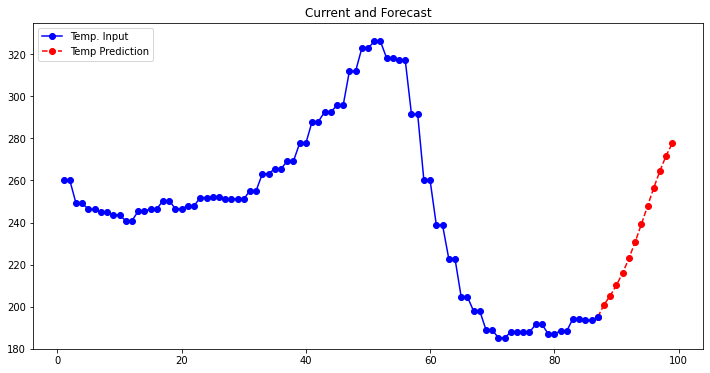

Iteration: 68
Temperature predicted to climb by 74.95433596889285°C in the next minute. Remain alert and prepare to turn off the coke feed.


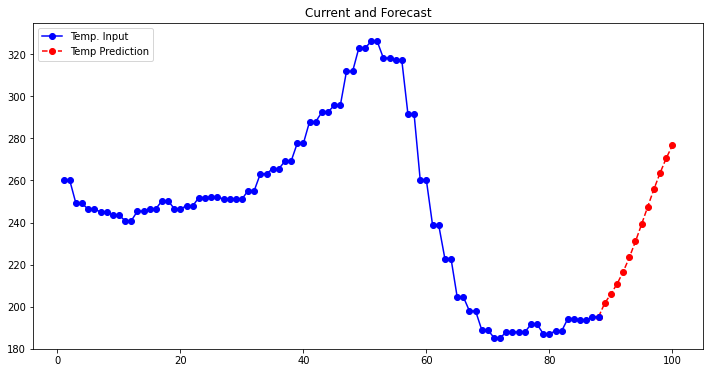

Iteration: 69
Temperature predicted to climb by 74.33486439710597°C in the next minute. Remain alert and prepare to turn off the coke feed.


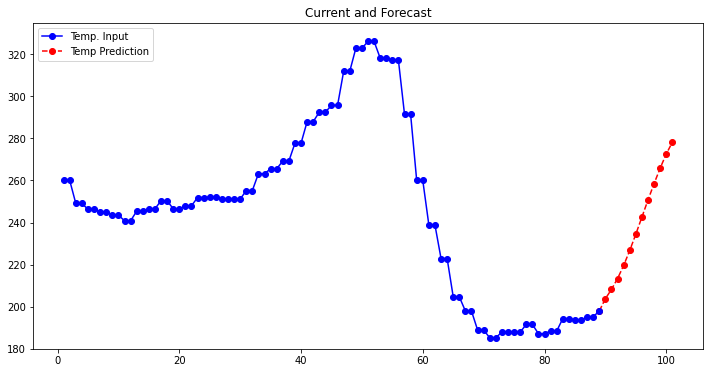

Iteration: 70
Temperature predicted to climb by 72.99083196711308°C in the next minute. Remain alert and prepare to turn off the coke feed.


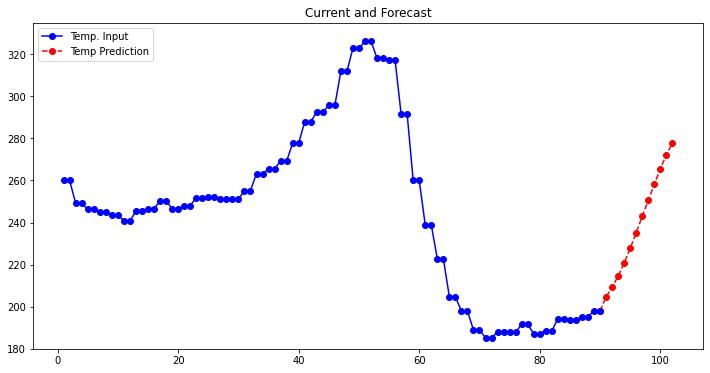

Iteration: 71
Temperature predicted to climb by 70.6732802969313°C in the next minute. Remain alert and prepare to turn off the coke feed.


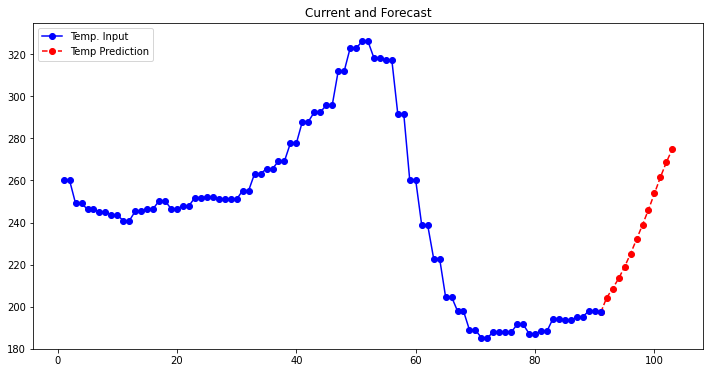

Iteration: 72
Temperature predicted to climb by 65.78300033310265°C in the next minute. Remain alert and prepare to turn off the coke feed.


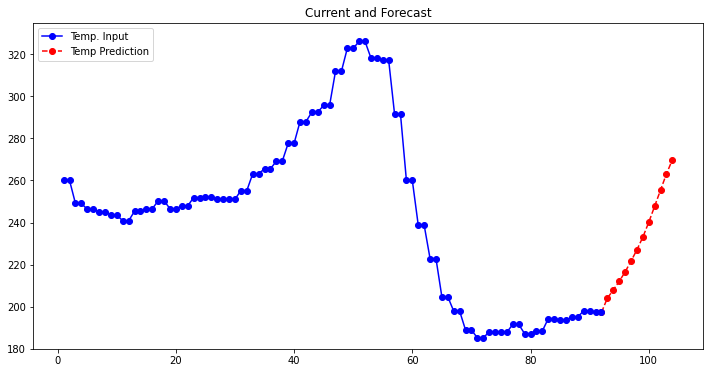

Iteration: 73
Temperature predicted to climb by 63.12398577022614°C in the next minute. Remain alert and prepare to turn off the coke feed.


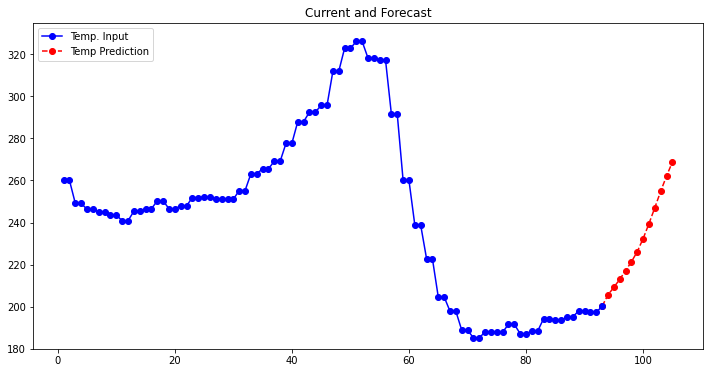

Iteration: 74
Temperature predicted to climb by 57.70660553319681°C in the next minute. Remain alert and prepare to turn off the coke feed.


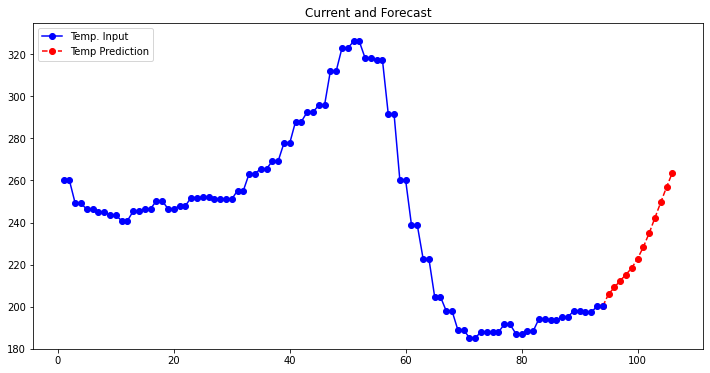

Iteration: 75
Temperature predicted to climb by 62.27589454324345°C in the next minute. Remain alert and prepare to turn off the coke feed.


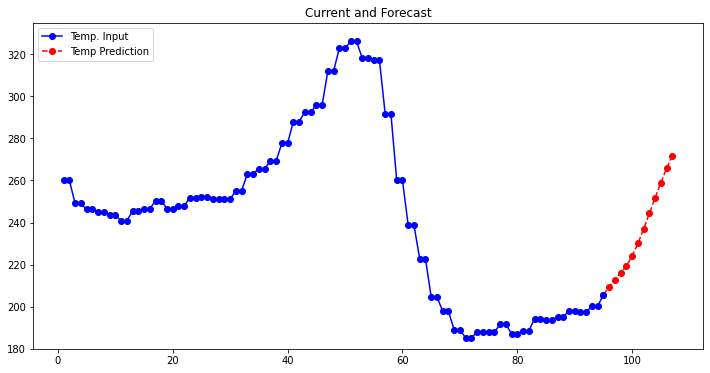

Iteration: 76
Temperature predicted to climb by 61.82690684432538°C in the next minute. Remain alert and prepare to turn off the coke feed.


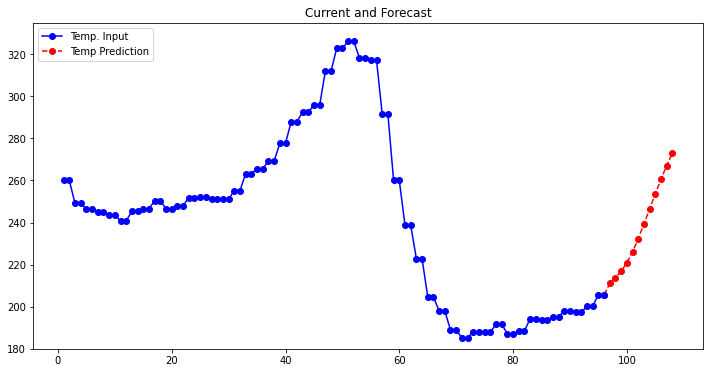

Iteration: 77
Temperature predicted to climb by 63.22143672363643°C in the next minute. Remain alert and prepare to turn off the coke feed.


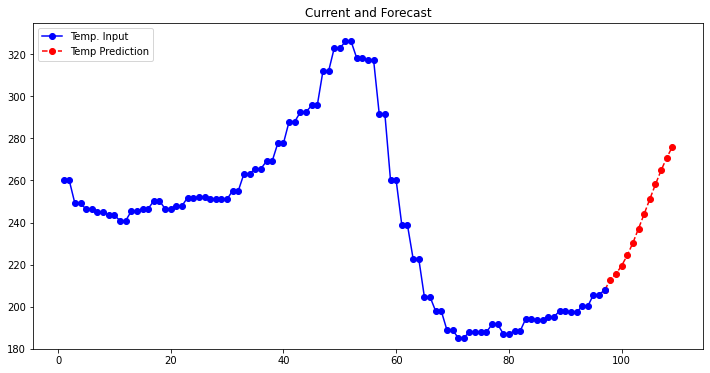

Iteration: 78
Temperature predicted to climb by 62.75372392405529°C in the next minute. Remain alert and prepare to turn off the coke feed.


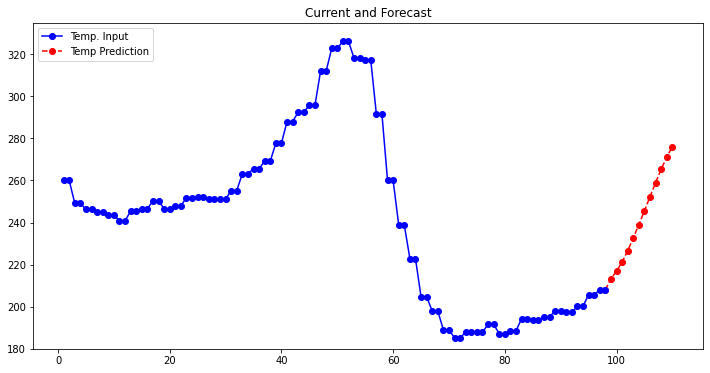

Iteration: 79
Temperature predicted to climb by 64.77766350240455°C in the next minute. Remain alert and prepare to turn off the coke feed.


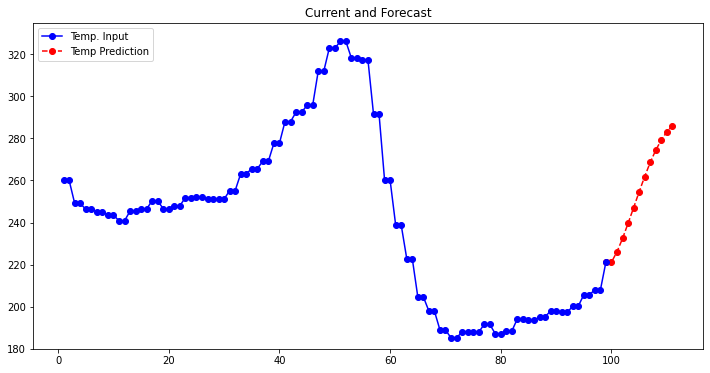

Iteration: 80
Temperature predicted to climb by 61.502590614278034°C in the next minute. Remain alert and prepare to turn off the coke feed.


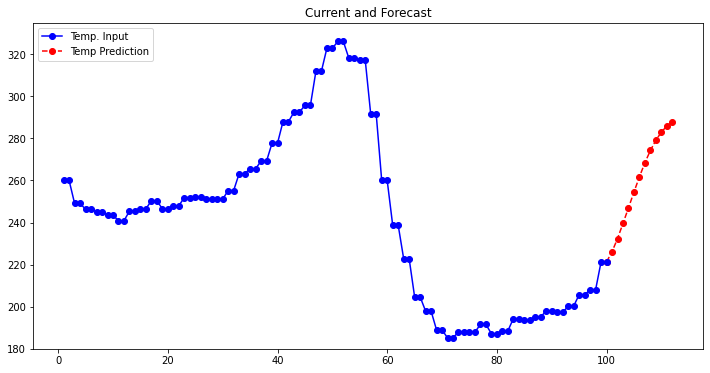

Iteration: 81
Temperature predicted to climb by 54.67108574830419°C in the next minute. Remain alert and prepare to turn off the coke feed.


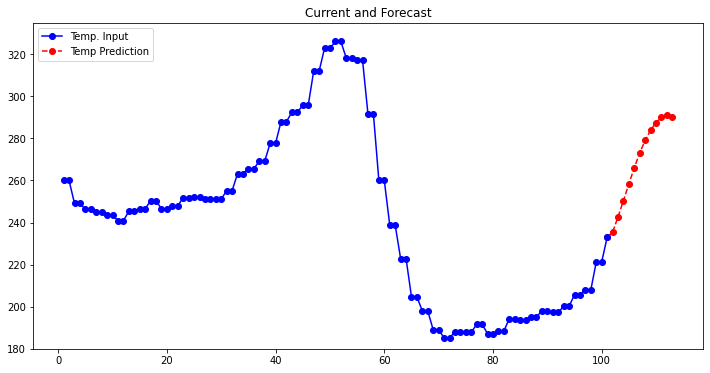

Iteration: 82
Temperature predicted to climb by 43.524226858201274°C in the next minute. Remain alert and prepare to turn off the coke feed.


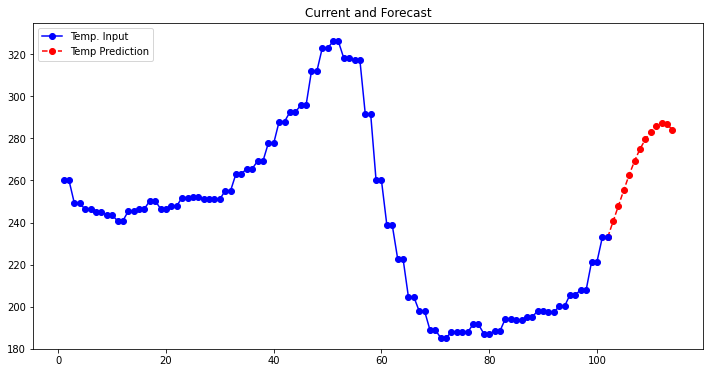

Iteration: 83
Temperature predicted to climb by 31.525378401366936°C in the next minute. Remain alert and prepare to turn off the coke feed.


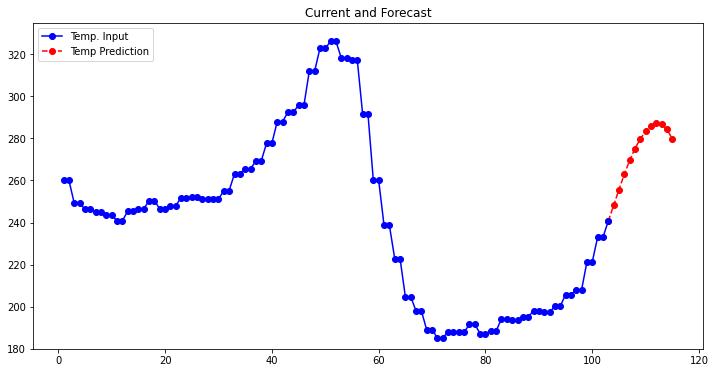

Iteration: 84
Temperature predicted to climb by 16.045405546022863°C in the next minute. Remain alert and prepare to turn off the coke feed.


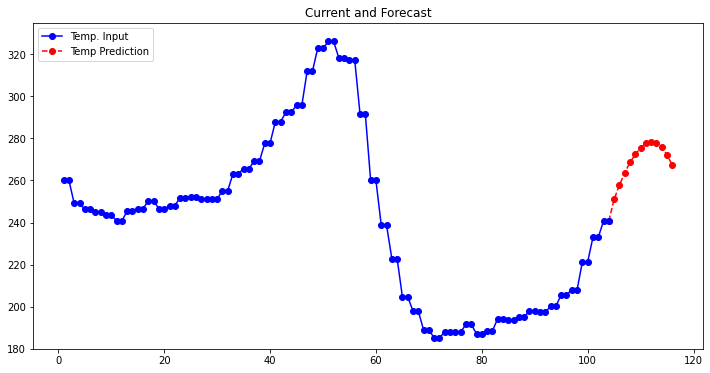

Iteration: 85
No alarm.


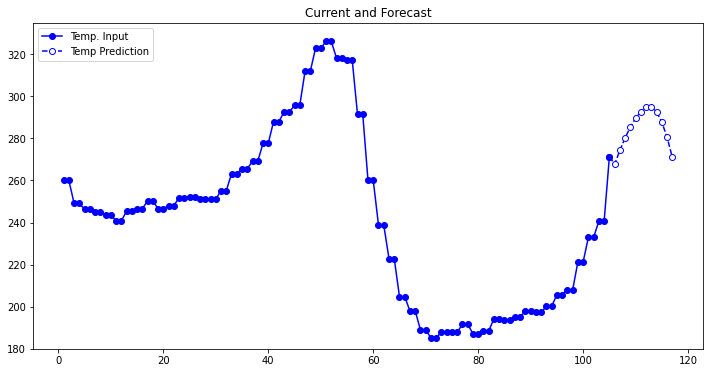

Iteration: 86
No alarm.


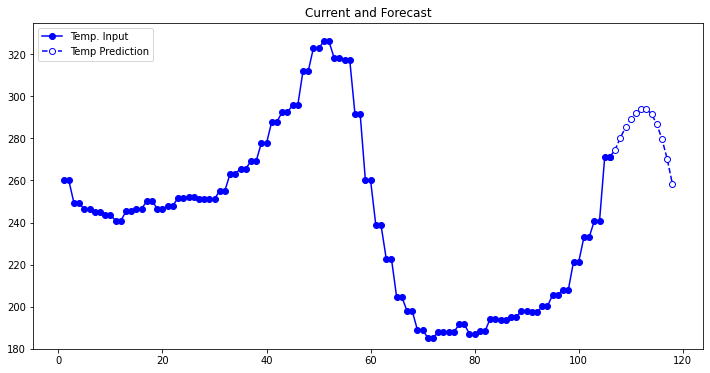

Iteration: 87
No alarm.


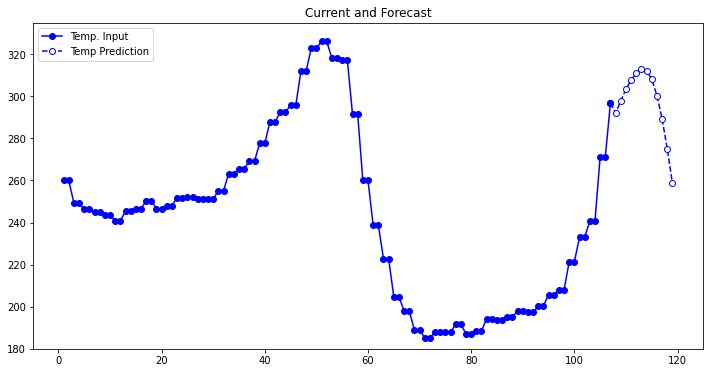

Iteration: 88
No alarm.


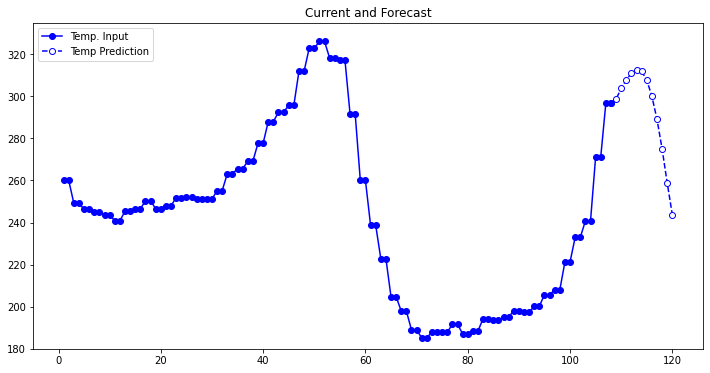

Iteration: 89
No alarm.


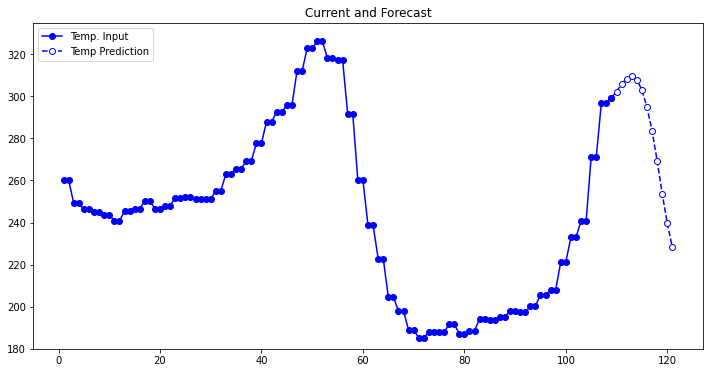

Iteration: 90
No alarm.


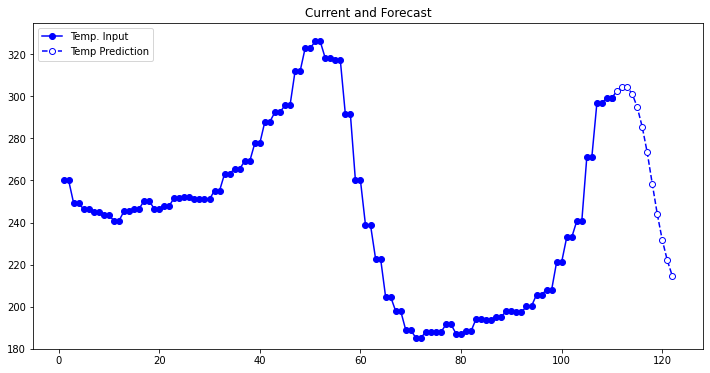

Iteration: 91
No alarm.


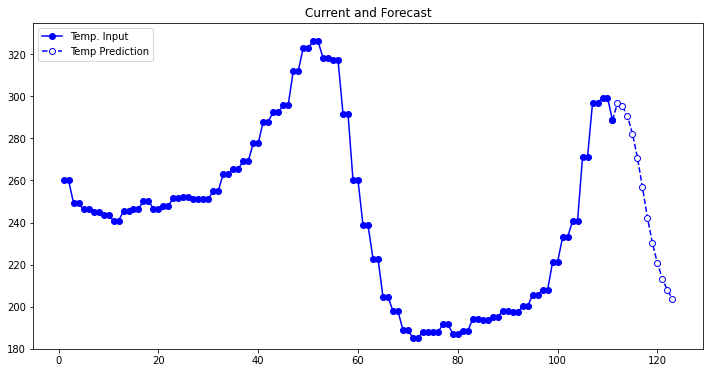

Iteration: 92
No alarm.


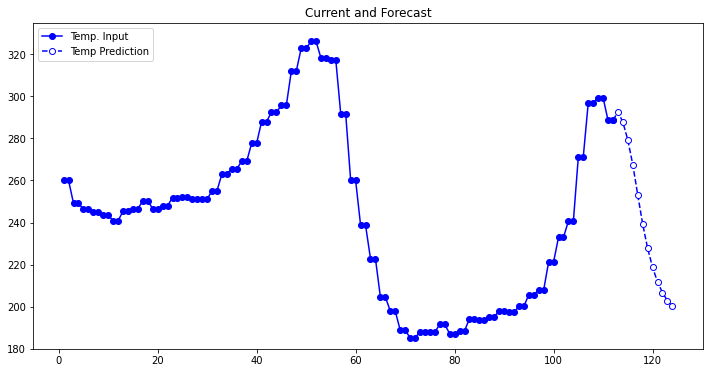

Iteration: 93
No alarm.


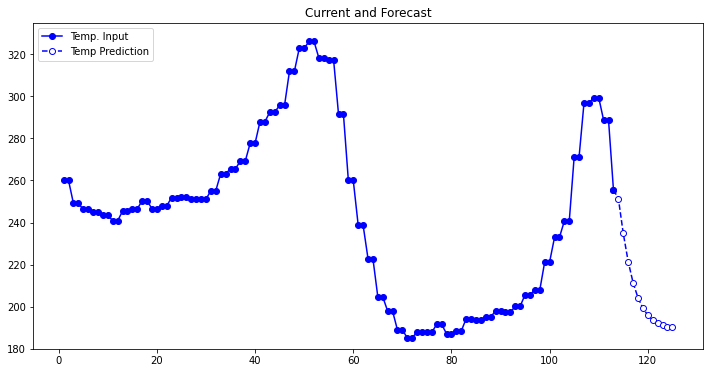

Iteration: 94
No alarm.


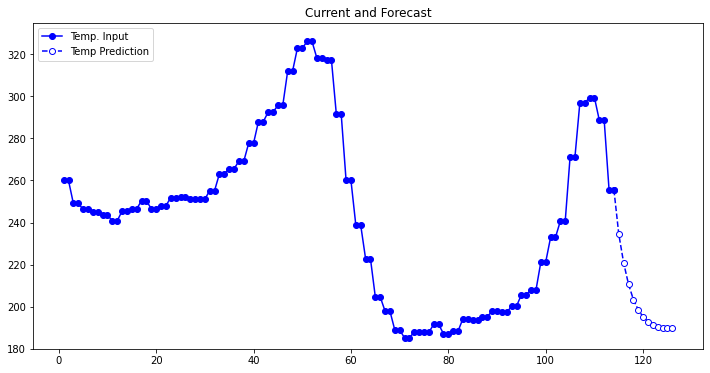

Iteration: 95
No alarm.


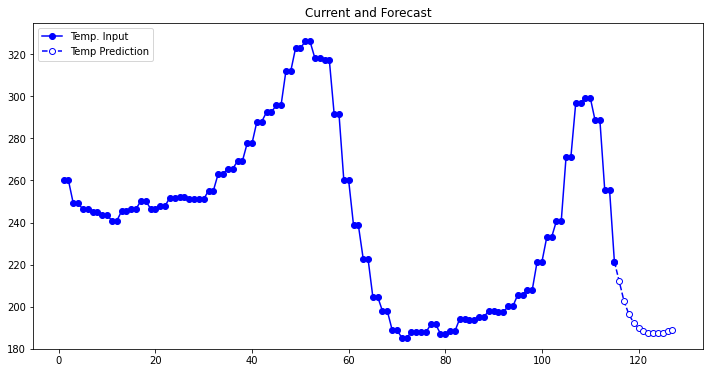

Iteration: 96
No alarm.


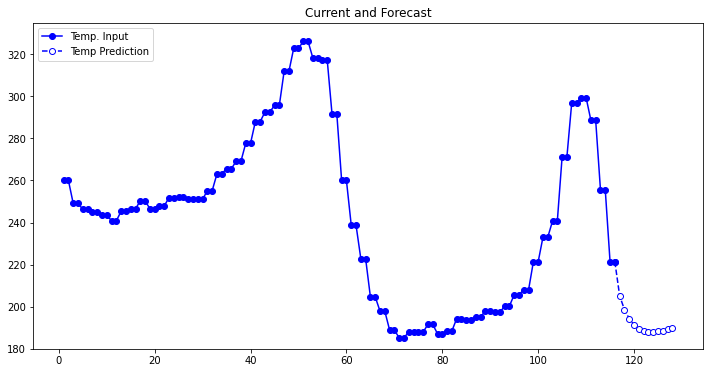

Iteration: 97
No alarm.


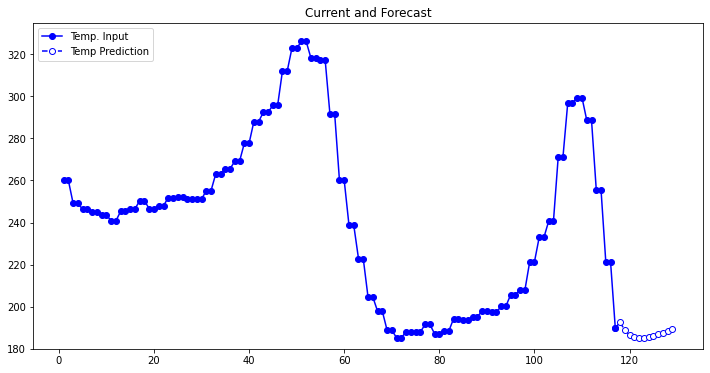

Iteration: 98
No alarm.


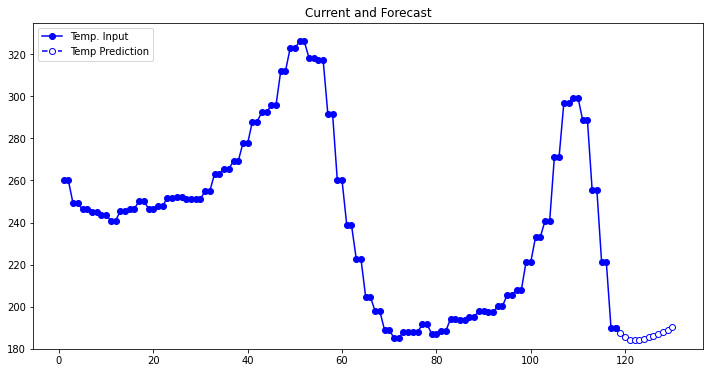

Iteration: 99
No alarm.


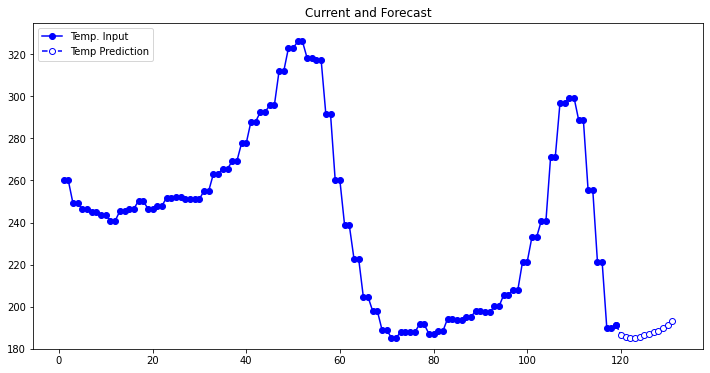

In [14]:
# #feed the data to the predictor using a sliding window

start = 0
stop = 20 # number of 5 second periods to pass into the predictor as the input
executions = 100 # number of predictions to perform
q = 0 # used to track the # of predictions performed

#slide the input window, feed the predictor, 100 times
for z in range(executions):
    
    # default alert to false
    alert = False
    
    # slice the window; grab 20 increments; convert to numpy array
    new_input = np.array([x for x in input[start:stop]])
    stop += 1
    
    # generate the prediction
    pred = forecast(new_input,12) #12 x 5 seconds = 1 minute

    # print the current iteration #
    print(f"Iteration: {q}")
    
    # determine if alerting is required
    alert = eval_alert(pred)
       
    # increment the iteration count
    q += 1
    
    #append the input and the prediction; visualize results
    viz(new_input, pred, alert, q)